<a href="https://colab.research.google.com/github/JuanDValenciano/HyperspectralTools_Multi/blob/master/Python/Colaboratory/RadianceCorrection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correction Radiance

by: JuanD Valenciano. UNAL-2020

Ruta de archivo:
Python/Colaboratory/RadianceCorrection.ipynb

Se activa el almacenamiento en google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


instalación de la libreria adicionales

In [2]:
!pip install PyOpenGL PyOpenGL_accelerate
#!pip install -U wxPython
!pip install -U \
    -f https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04 \
    wxPython
!pip install Pillow
!pip install spectral

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp36-cp36m-linux_x86_64.whl size=1593682 sha256=07ca434995684fb4faffa1cde44ec8a090e11d6bc4a548dd2e2576f5a92de02f
  Stored in directory: /root/.cache/pip/wheels/bd/21/77/99670ceca25fddb3c2b60a7ae44644b8253d1006e8ec417bcc
Successfully built PyOpenGL-accelerate
Looking in links: https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04
     |████████████████████████████████| 104.4MB 46kB/s 
     |████████████████████████████████| 153kB 2.8MB/s 
  Created wheel for spectral: filename=spectral-0.20-cp36-none-any.whl size=183917 sha256=e9da0875d454bf68e21eee56e0b88771c291fe5490315e0556f2eb605ff23e40
  Stored in directory: /root/.cache/pip/wheels/ad/cf/f3/3cab28f6aed46f15c8db09c6ad678483610426261025e61ff8
Successfully built spectral


Cargar librerias.

In [0]:
import spectral.io.envi as envi
#import spectral
from spectral import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import wx
#from wx import glcanvas
import numpy as np 
import warnings
import pandas as pd
#from IPython.html.widgets import *
from ipywidgets import *
#from IPython.html.widgets import interact # IPython < 4.x

Datos hiperespectrales GoogleDrive


In [23]:
dataTest_hdr     = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/rawData/test2_16000_us_2x_2019-11-25T124320_corr.hdr'
dataTest_hyspex  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/rawData/test2_16000_us_2x_2019-11-25T124320_corr.hyspex'
dataTest = envi.open(dataTest_hdr, dataTest_hyspex)

dataTommy_hdr    = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/rawData/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hdr'
dataTommy_hyspex = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/rawData/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hyspex'
dataTommy = envi.open(dataTommy_hdr, dataTommy_hyspex)

############## Test ##############
######  dataTest uint16_t  #######
dataTest_uint16t_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad.hdr'
dataTest_uint16t_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad.img'
dataTest_uint16t_corr_rad = envi.open(dataTest_uint16t_corr_rad_hdr, dataTest_uint16t_corr_rad_img)

dataTest_uint16t_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.hdr'
dataTest_uint16t_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.img'
dataTest_uint16t_corr_rad_REF = envi.open(dataTest_uint16t_corr_rad_REF_hdr, dataTest_uint16t_corr_rad_REF_img)
######  dataTest Float  ##########
dataTest_Float_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_f32.hdr'
dataTest_Float_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_f32.img'
dataTest_Float_corr_rad = envi.open(dataTest_Float_corr_rad_hdr, dataTest_Float_corr_rad_img)

dataTest_Float_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.hdr'
dataTest_Float_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_All_Float_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.img'
dataTest_Float_corr_rad_REF = envi.open(dataTest_Float_corr_rad_REF_hdr, dataTest_Float_corr_rad_REF_img)
##################################
############# Tommy ##############
#######  Tommy uint16_t  #########
Tommy_uint16t_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad.hdr'
Tommy_uint16t_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad.img'
Tommy_uint16t_corr_rad = envi.open(Tommy_uint16t_corr_rad_hdr, Tommy_uint16t_corr_rad_img)

Tommy_uint16t_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.hdr'
Tommy_uint16t_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_uint16t/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.img'
Tommy_uint16t_corr_rad_REF = envi.open(Tommy_uint16t_corr_rad_REF_hdr, Tommy_uint16t_corr_rad_REF_img)
#######  Tommy Float  ############
Tommy_Float_corr_rad_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_f32.hdr'
Tommy_Float_corr_rad_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_f32.img'
Tommy_Float_corr_rad = envi.open(Tommy_Float_corr_rad_hdr, Tommy_Float_corr_rad_img)

Tommy_Float_corr_rad_REF_hdr  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.hdr'
Tommy_Float_corr_rad_REF_img  = '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Tommy/Data_All_Float/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_REF.img'
Tommy_Float_corr_rad_REF = envi.open(Tommy_Float_corr_rad_REF_hdr, Tommy_Float_corr_rad_REF_img)
##################################

print('####################################################################\n')
print('rawData\n')
print('dataTest:', dataTest)
print('uint16_t\n')
print('dataTest_uint16t_corr_rad:', dataTest_uint16t_corr_rad)
print('dataTest_uint16t_corr_rad_REF:', dataTest_uint16t_corr_rad_REF)
print('float\n')
print('dataTest_Float_corr_rad:', dataTest_Float_corr_rad)
print('dataTest_Float_corr_rad_REF:', dataTest_Float_corr_rad_REF)
print('####################################################################\n')
print('rawData\n')
print('dataTest:', dataTommy)
print('uint16_t\n')
print('Tommy_uint16t_corr_rad:', Tommy_uint16t_corr_rad)
print('Tommy_uint16t_corr_rad_REF:', Tommy_uint16t_corr_rad_REF)
print('float\n')
print('Tommy_Float_corr_rad:', Tommy_Float_corr_rad)
print('Tommy_Float_corr_rad_REF:', Tommy_Float_corr_rad_REF)
print('####################################################################\n')

####### spectral target ##########
dataSpectralTarget = pd.read_csv('/content/drive/My Drive/Tesis/software/spectra_target.csv',   header=None)
print('spectral target\n', dataSpectralTarget)
print('####################################################################\n')
##################################
'''
#img.info()
#view = imshow(img)
#view_nd(img)
#save_rgb('rgb.jpg', img, [29, 19, 9])
'''

####################################################################

rawData

dataTest: 	Data Source:   '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/rawData/test2_16000_us_2x_2019-11-25T124320_corr.hyspex'
	# Rows:            800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
uint16_t

dataTest_uint16t_corr_rad: 	Data Source:   '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad.img'
	# Rows:            800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
dataTest_uint16t_corr_rad_REF: 	Data Source:   '/content/drive/My Drive/Tesis/DatosAnalizar/Hyspex_Radiance/Test/Data_uint16t_Test/test2_16000_us_2x_2019-11-25T124320_corr_rad_REF.img'
	# Rows:            800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  

"\n#img.info()\n#view = imshow(img)\n#view_nd(img)\n#save_rgb('rgb.jpg', img, [29, 19, 9])\n"

Visualizar datos

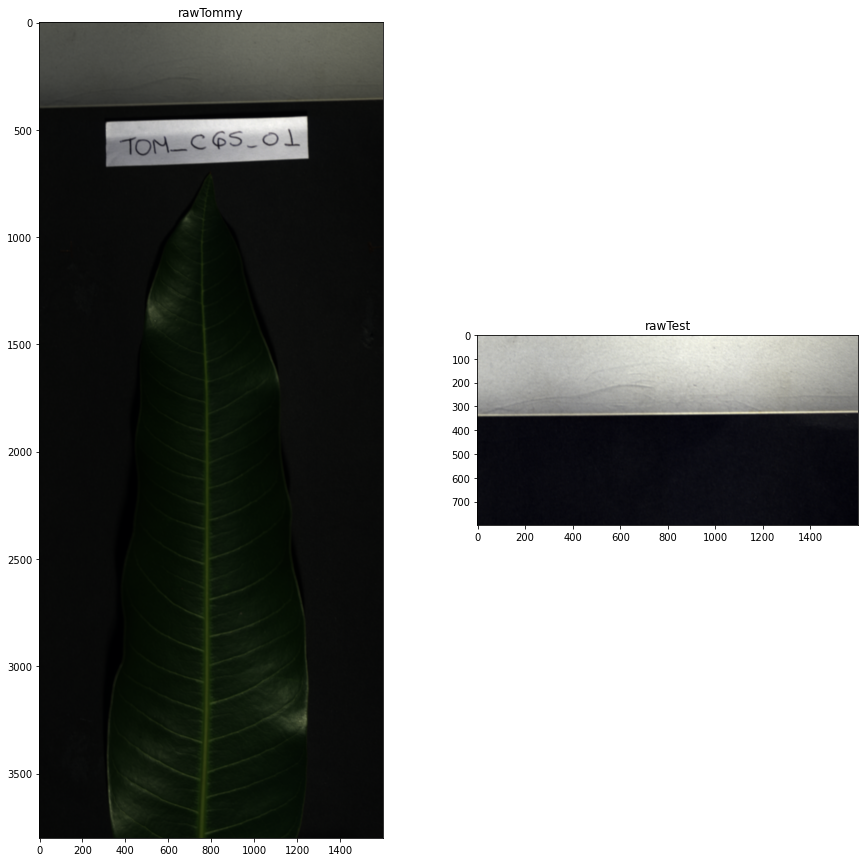

In [90]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(get_rgb(dataTommy)), plt.title('rawTommy')
plt.subplot(122), plt.imshow(get_rgb(dataTest)), plt.title('rawTest')
plt.show()